<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Holt_winters_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index03-20.csv'
df = pd.read_csv(path, parse_dates=['Date'])
print(df.shape)
df.head()

(932, 3)


,Date,Conc,w_i
0,2003-01-05,26.200000,1.837894
1,2003-01-12,34.428571,2.415117
2,2003-01-19,9.428571,0.661401
3,2003-01-26,16.142857,1.132399
4,2003-02-02,6.833333,0.479349


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    932 non-null    datetime64[ns]
 1   Conc    929 non-null    float64       
 2   w_i     929 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 22.0 KB


In [5]:
df.iloc[88:].head(50)

,Date,Conc,w_i
88,2004-09-12,NaN,NaN
89,2004-09-19,NaN,NaN
90,2004-09-26,NaN,NaN
91,2004-10-03,12.000000,0.889058
92,2004-10-10,15.857143,1.174827
93,2004-10-17,9.428571,0.698546
94,2004-10-24,10.333333,0.765578
95,2004-10-31,19.142857,1.418260
96,2004-11-07,11.285714,0.836138
97,2004-11-14,16.428571,1.217163


In [15]:
#df['w_i'].iloc[lambda x: x == 'NaN']
df.fillna(method= 'pad', inplace=True)

In [7]:
df.iloc[80:].head(50)

,Date,Conc,w_i
80,2004-07-18,11.285714,0.836138
81,2004-07-25,22.333333,1.654637
82,2004-08-01,22.800000,1.689211
83,2004-08-08,23.000000,1.704029
84,2004-08-15,16.285714,1.206579
85,2004-08-22,21.142857,1.566436
86,2004-08-29,18.714286,1.386508
87,2004-09-05,22.500000,1.666985
88,2004-09-12,22.500000,1.666985
89,2004-09-19,22.500000,1.666985


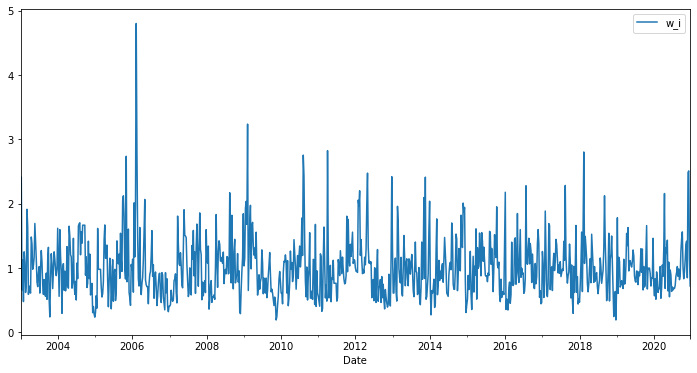

In [16]:
df[['w_i']].plot(figsize=(12,6))

In [9]:
df.set_index('Date', inplace=True)
df.head()

,Conc,w_i
Date,,
2003-01-05,26.200000,1.837894
2003-01-12,34.428571,2.415117
2003-01-19,9.428571,0.661401
2003-01-26,16.142857,1.132399
2003-02-02,6.833333,0.479349


In [12]:
df.index
df = df.asfreq('W')
#You must setup the frequency ts_log = ts_log.asfreq('W') https://stackoverflow.com/questions/64025453/attributeerror-rangeindex-object-has-no-attribute-inferred-freq

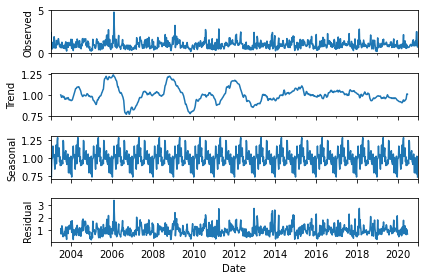

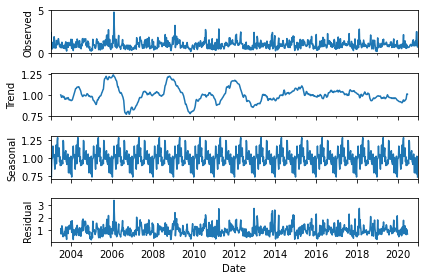

In [19]:
decompose_result = seasonal_decompose(df['w_i'], model='multiplicative')
decompose_result.plot()

In [20]:
df.index.freq = 'W'
m = 12
alpha = 1/(2*m)

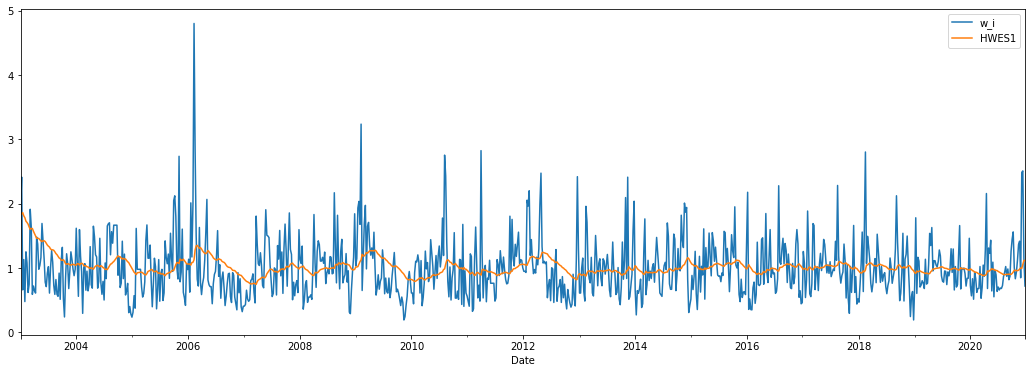

In [23]:
df['HWES1'] = SimpleExpSmoothing(df['w_i']).fit(smoothing_level = alpha, optimized = False, use_brute= True).fittedvalues
df[['w_i','HWES1']].plot(figsize = (18,6))